In [1]:
import pandas as pd
import numpy as np

In [2]:
# read TDG2 file
TDG2_file = "../data/TDG2/TDG2_mutate_one_allsites.csv"
TDG2_df = pd.read_csv(TDG2_file)
TDG2_df.head()

,comment,mut,sequence,fitness
0,mutations: A147Y probability: 11.3856,A147Y,FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...,11.385650
1,mutations: F1M probability: 3.9782,F1M,MFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...,3.978224
2,mutations: V274A probability: 3.6236,V274A,FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...,3.623650
3,mutations: H92A probability: 3.2447,H92A,FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...,3.244741
4,mutations: P43R probability: 2.7918,P43R,FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKARAGQ...,2.791762


In [3]:
# CD area from 93 to 304, 1-based
CD_area_sites = set(range(93, 305))
# no CD area from 1 to 92, 1-based
noCD_area_sites = set(range(1, 93))

In [4]:
# split CD and no CD by rank
TDG2_CD_df = []
TDG2_noCD_df = []
for idx, row in TDG2_df.iterrows():
    mut = row["mut"]
    rank = idx + 1
    row["rank"] = rank
    if mut != "WT" and int(mut[1:-1]) in CD_area_sites:
        TDG2_CD_df.append(row)
    elif mut != "WT" and int(mut[1:-1]) in noCD_area_sites:
        TDG2_noCD_df.append(row)
TDG2_CD_df = pd.DataFrame(TDG2_CD_df).sort_values(by="fitness", ascending=False)
TDG2_noCD_df = pd.DataFrame(TDG2_noCD_df).sort_values(by="fitness", ascending=False)
TDG2_CD_df.head(), TDG2_noCD_df.head()

(                                 comment    mut  \
 0  mutations: A147Y probability: 11.3856  A147Y   
 2   mutations: V274A probability: 3.6236  V274A   
 5   mutations: I103Q probability: 2.6124  I103Q   
 6   mutations: A147F probability: 2.3506  A147F   
 8   mutations: I103K probability: 2.0289  I103K   
 
                                             sequence    fitness  rank  
 0  FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...  11.385650     1  
 2  FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...   3.623650     3  
 5  FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...   2.612375     6  
 6  FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...   2.350613     7  
 8  FFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQ...   2.028880     9  ,
                                 comment   mut  \
 1    mutations: F1M probability: 3.9782   F1M   
 3   mutations: H92A probability: 3.2447  H92A   
 4   mutations: P43R probability: 2.7918  P43R   
 7   mutations: P43K probability: 2.2654  P43K 

In [9]:
count_results = []
for rank in range(10, 2000):
    CD_count = len(TDG2_CD_df[TDG2_CD_df["rank"] <= rank])
    noCD_count = len(TDG2_noCD_df[TDG2_noCD_df["rank"] <= rank])
    count_results.append((rank, CD_count/(rank*len(CD_area_sites)), noCD_count/(rank*len(noCD_area_sites))))
    if rank == 51:
        print(CD_count, noCD_count)
        print(count_results[-1])
        break

30 20
(51, 0.002774694783573807, 0.004262574595055414)


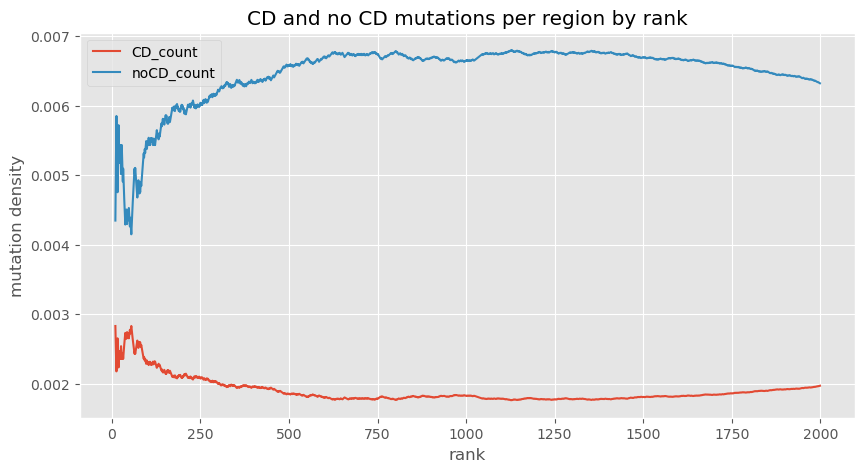

In [50]:
# count the number of mutations in CD and no CD by rank
count_results = []
for rank in range(10, 2000):
    CD_count = len(TDG2_CD_df[TDG2_CD_df["rank"] <= rank])
    noCD_count = len(TDG2_noCD_df[TDG2_noCD_df["rank"] <= rank])
    count_results.append((rank, CD_count/(rank*len(CD_area_sites)), noCD_count/(rank*len(noCD_area_sites))))
count_results = pd.DataFrame(count_results, columns=["rank", "CD_count", "noCD_count"])
# plot a fine figure
import matplotlib.pyplot as plt
plt.style.use('ggplot')
count_results.plot(x="rank", y=["CD_count", "noCD_count"], figsize=(10, 5), title="CD and no CD mutations per region by rank", ylabel="mutation density", xlabel="rank")
# save as pdf
plt.savefig("1_figs/CD_and_noCD_perregion_rank.pdf")

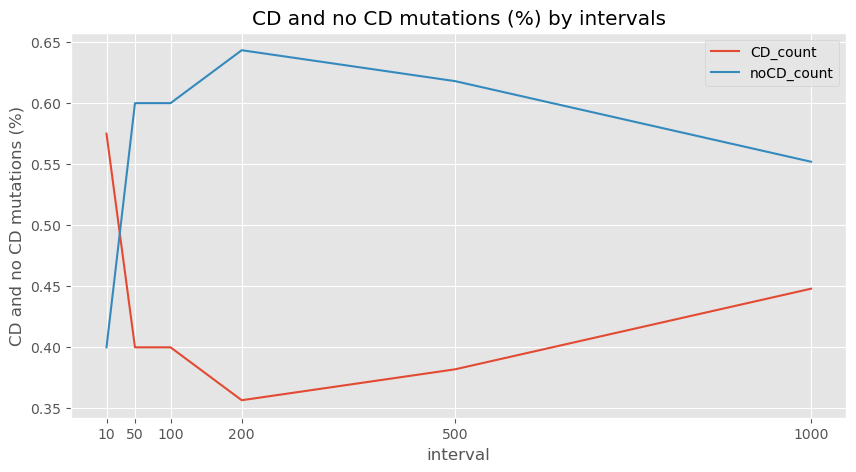

In [48]:
# count the number of mutations in CD and no CD by intervals
intervals = [10, 50, 100, 200, 500, 1000, 2000]
count_results_interval = []
for start_interval, end_interval in zip(intervals, intervals[1:]):
    CD_count = len(TDG2_CD_df[(TDG2_CD_df["rank"] <= end_interval) & (TDG2_CD_df["rank"] > start_interval)])
    noCD_count = len(TDG2_noCD_df[(TDG2_noCD_df["rank"] <= end_interval) & (TDG2_noCD_df["rank"] > start_interval)])
    count_results_interval.append((start_interval, CD_count/((end_interval-start_interval)), noCD_count/((end_interval-start_interval))))
count_results_interval = pd.DataFrame(count_results_interval, columns=["interval", "CD_count", "noCD_count"])
# plot a fine figure
import matplotlib.pyplot as plt
plt.style.use('ggplot')
count_results_interval.plot(x="interval", y=["CD_count", "noCD_count"], figsize=(10, 5), title="CD and no CD mutations (%) by intervals", xticks=intervals[:-1], ylabel="CD and no CD mutations (%)")
# save as pdf
plt.savefig("1_figs/CD_and_noCD_percent_interval.pdf")

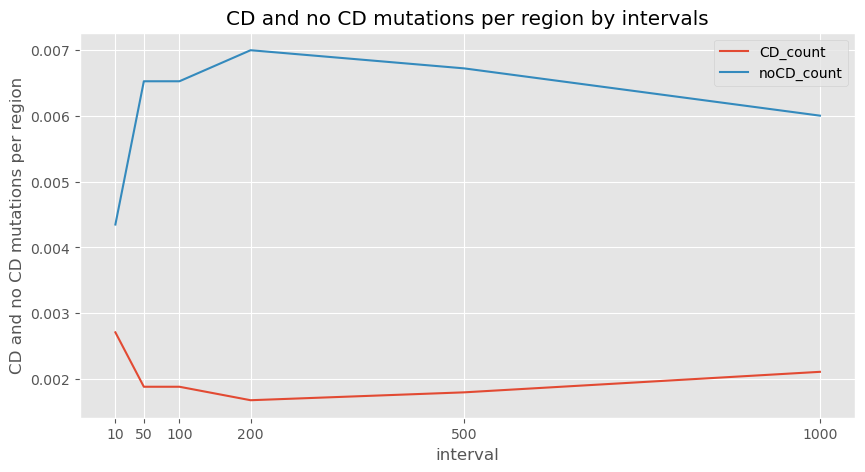

In [49]:
# count the number of mutations in CD and no CD by intervals
intervals = [10, 50, 100, 200, 500, 1000, 2000]
count_results_interval = []
for start_interval, end_interval in zip(intervals, intervals[1:]):
    CD_count = len(TDG2_CD_df[(TDG2_CD_df["rank"] <= end_interval) & (TDG2_CD_df["rank"] > start_interval)])
    noCD_count = len(TDG2_noCD_df[(TDG2_noCD_df["rank"] <= end_interval) & (TDG2_noCD_df["rank"] > start_interval)])
    count_results_interval.append((start_interval, CD_count/((end_interval-start_interval)*len(CD_area_sites)), noCD_count/((end_interval-start_interval)*len(noCD_area_sites))))
count_results_interval = pd.DataFrame(count_results_interval, columns=["interval", "CD_count", "noCD_count"])
# plot a fine figure
import matplotlib.pyplot as plt
plt.style.use('ggplot')
count_results_interval.plot(x="interval", y=["CD_count", "noCD_count"], figsize=(10, 5), title="CD and no CD mutations per region by intervals", xticks=intervals[:-1], ylabel="CD and no CD mutations per region")
# save as pdf
plt.savefig("1_figs/CD_and_noCD_perregion_interval.pdf")